Q3: Does the direction to the nearest horn affect weather a person hears the siren or not?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Reading and cleaning the data

In [10]:
data = pd.read_csv('siren_data_train.csv')
data = data.dropna()

# Visualize the data

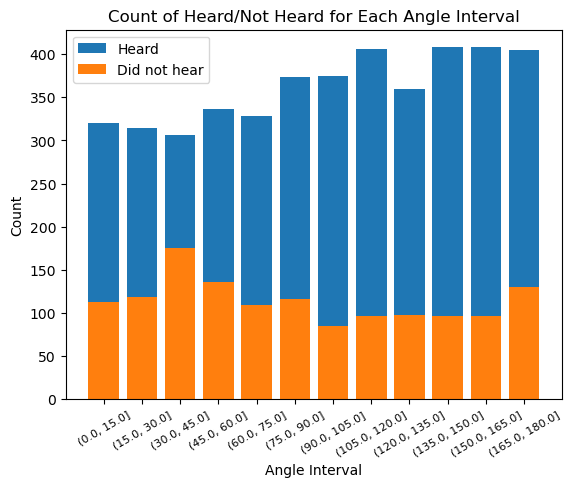

In [ ]:
intervals = np.arange(0, data['near_angle'].abs().max() + 15, 15)
data['angle_interval'] = pd.cut(data['near_angle'].abs(), intervals)

mean_heard_by_interval = data[data['heard'] == 1].groupby('angle_interval')['heard'].count()
mean_not_heard_by_interval = data[data['heard'] == 0].groupby('angle_interval')['heard'].count()

plt.bar(mean_heard_by_interval.index.astype(str), mean_heard_by_interval.values, label='Heard', color='#ff7f0e')
plt.bar(mean_not_heard_by_interval.index.astype(str), mean_not_heard_by_interval.values, label='Did not hear', color='#1f77b4')
plt.xlabel('Angle Interval')
plt.ylabel('Count')
plt.title('Count of Heard/Not Heard for Each Angle Interval')
plt.xticks(fontsize=8, rotation=30)
plt.legend()
plt.show()


As we can see, there doesn't seem to be any existing relationship between the variables. We continue by fitting a logistic regression curve to the data. 

Spearman correlation:  0.006705393316314735


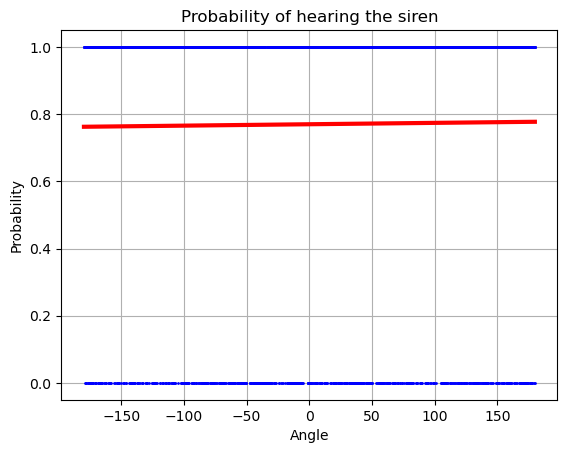

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data['near_angle'].values.reshape(-1,1)
y = data['heard'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

plt.scatter(X_test, y_test, zorder=20, color='blue', s=1)

x_sequence = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

plt.plot(x_sequence, logreg.predict_proba(x_sequence)[:,1], color='red', linewidth=3)
plt.xlabel('Angle')
plt.ylabel('Probability')
plt.title('Probability of hearing the siren')
plt.grid(True)
plt.show()

Once again, we cant find any relationship between the variables in the regression curve, in addition the Spearman correlation is very low which suggests that there is no correlation.
\
\
Answer: No, the direction to the nearest horn doesn't affect whether a person hears the siren. 